#バスケワールドカップ（8月25から9月10日）注目度分析と公式アカウントの分析

> バスケワールドカップが現在開催されており,、日本が歴史的勝利をしたなどと、ニュースで報じられている。そこで、この盛り上がりはどの程度なのをかを分析しようと考えた。

> そこで、インスタグラムの日本バスケットボール協会の公式アカウントから投稿情報をインスタグラムのAPIを使い取得し、分析することを考えた。具体的な、分析の流れを以下に示す。

1.バスケワールドカップの盛り上がり分析
  1. インスタグラムのAPIを取得する。
  2. 取得したAPIを用いて公式アカウントの投稿情報を取得する。
  3. 投稿情報のいいね数をバスケの盛り上がり具合と考えていいね数を可視化する。
  4. 可視化したグラフをもとにどのような出来事によっていいね数が伸びているかを分析する

次に、公式アカウントに関する情報で時間に関する情報や、投稿の内容に関するテキストデータに対しての分析を通して、投稿頻度や投稿時間、投稿内容に関してどのような傾向や特徴があるかをつかむ。

2.日本バスケットボール協会の公式アカウント分析
  1. 投稿日時をもとに月、日、時間単位で投稿数がどのくらいあるかを整理する。
  2. 月ごと曜日ごとの投稿数の可視化
  3. 投稿時間ごとのいいね数の可視化
  4. 投稿内容のワードクラウドの作成






## バスケワールドカップの盛り上がりの可視化

### 1インスタグラムのAPIの取得をする。
さまざまなウェブサイトを見ながら取得する。
meta社の公式ドキュメントの流れに従ってAPIを取得する。
[Meta社の公式ドキュメント](https://developers.facebook.com/products/instagram/apis/)


### 2 取得したAPIを用いて公式アカウントの投稿情報を取得する

APIの中でもgraphAPIというAPIを用いて情報を取得する。その時のpythonコードを以下に示す。

#### APIを使ったデータ取得

In [ ]:
from pylab import rcParams
import requests
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

# アクセス情報
business_account_id = 'userid'
token = "access_token"
username = 'japan_basketball'
media_fields = 'timestamp,like_count,comments_count,caption'#取得する情報（投稿時間、いいね数、コメント数、投稿内容）

# メディア情報を取得する
def user_media_info(business_account_id,token,username,media_fields):
    all_response = []
    request_url = "https://graph.facebook.com/v17.0/{business_account_id}?fields=business_discovery.username({username}){{media{{{media_fields}}}}}&access_token={token}".format(business_account_id=business_account_id,username=username,media_fields=media_fields,token=token)
    response = requests.get(request_url)
    result = response.json()['business_discovery']
    all_response.append(result['media']['data'])

    # 1度に取得できる件数は25件のためループによって過去の情報を取得する
    if 'after' in result['media']['paging']['cursors'].keys():
        next_token = result['media']['paging']['cursors']['after']
        while next_token is not None:
            request_url = "https://graph.facebook.com/v17.0/{business_account_id}?fields=business_discovery.username({username}){{media.after({next_token}){{{media_fields}}}}}&access_token={token}".format(business_account_id=business_account_id,username=username,media_fields=media_fields,token=token,next_token=next_token)
            response = requests.get(request_url)
            result = response.json()['business_discovery']
            all_response.append(result['media']['data'])
            if 'after' in result['media']['paging']['cursors'].keys():
                next_token = result['media']['paging']['cursors']['after']
            else:
                next_token = None

    return all_response

result = user_media_info(business_account_id,token,username,media_fields)




#### 取得したデータをもとに可視化を行う

In [ ]:
#データの可視化

df_concat = None
df_concat = pd.DataFrame(result[0])

if len != 1:
    for i,g in enumerate(result):
        df_concat = pd.concat([pd.DataFrame(result[i]), df_concat])
#投稿時間をもとに取得データをソートする
df_concat_sort = df_concat.sort_values('timestamp').drop_duplicates('id').reset_index(drop='true')

df_concat_sort.set_index('timestamp')
rcParams['figure.figsize'] = 20,10

fig, ax = plt.subplots(1, 1)
#データ量が多すぎるため2020年12月からのデータ用いる
plt.plot(df_concat_sort[1000:]['timestamp'].str[:10], df_concat_sort[1000:]['like_count'],label='like_count')
plt.plot(df_concat_sort[1000:]['timestamp'].str[:10], df_concat_sort[1000:]['comments_count'],label='comments_count')
ax.legend()

#ラベルの表記の工夫
for idx,label in enumerate(ax.get_xticklabels()):
    if idx % 2 == 0:
        label.set_visible(False)
plt.xticks(rotation=45)
fig.subplots_adjust(left=0.2)

# グラフ出力
plt.show()



上記のコードによって出力されたグラフの横軸をさらに1月間隔に表示間隔を変更したものを以下に示す。

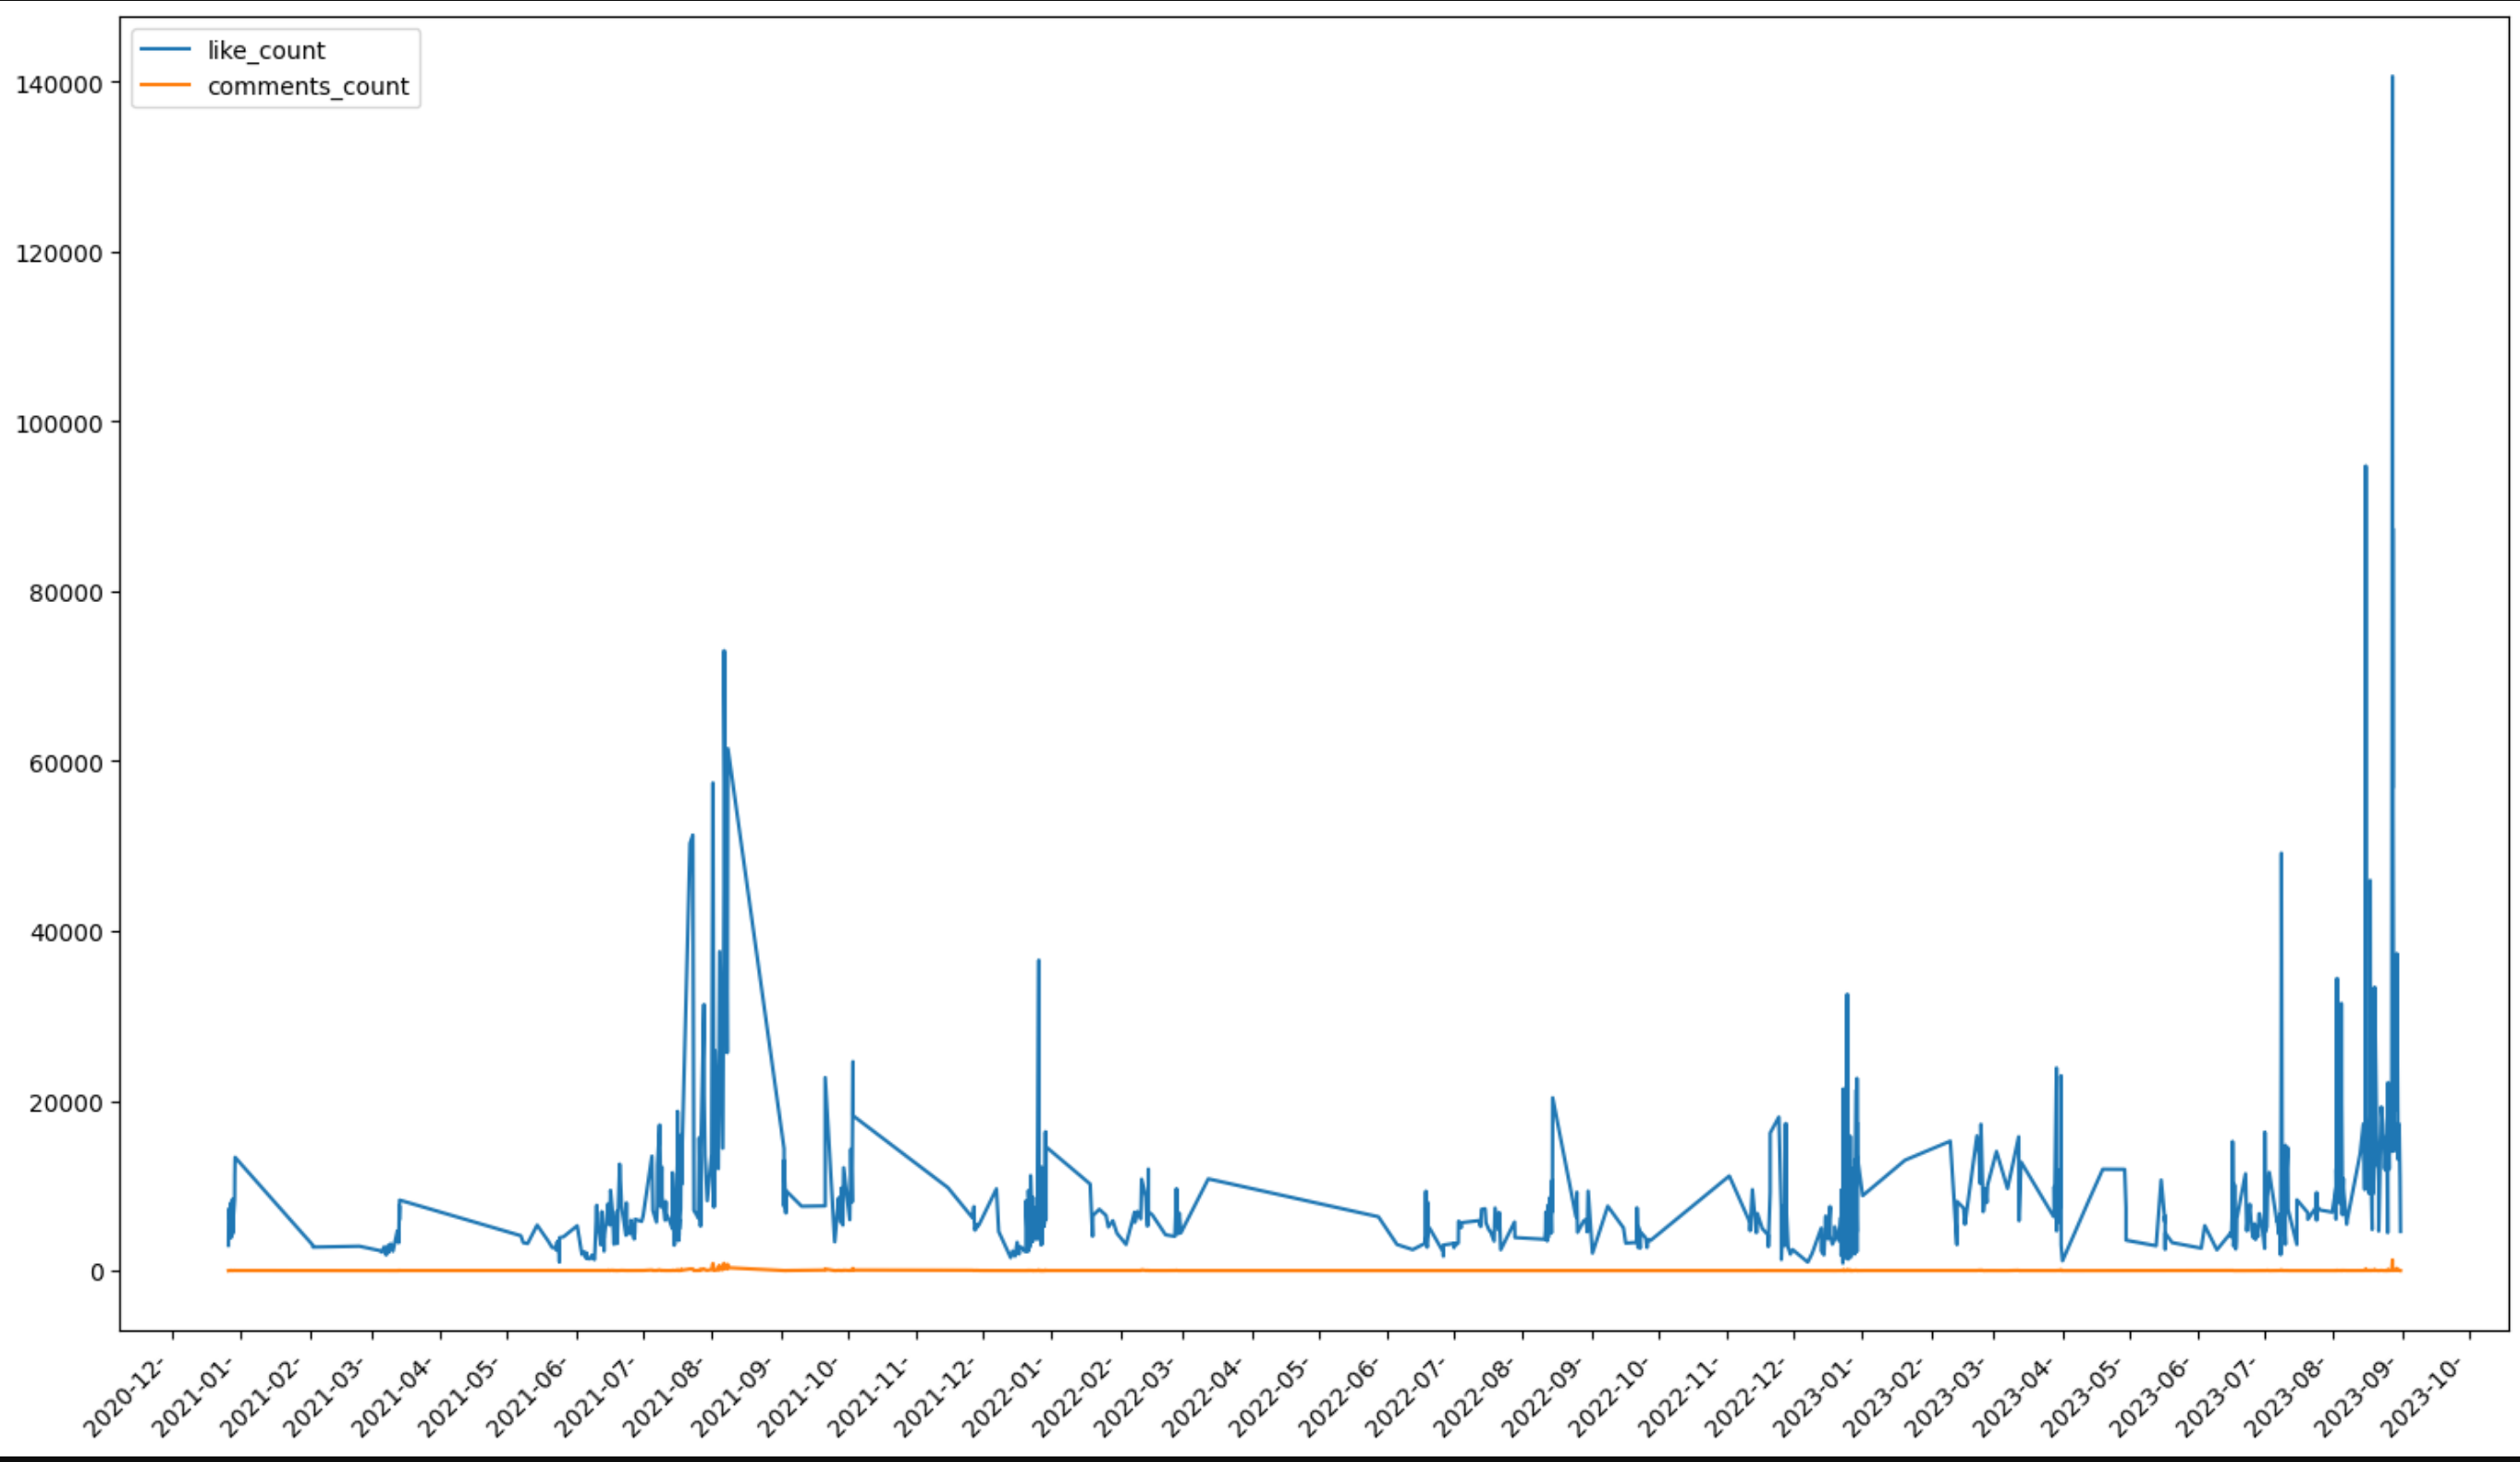

> 公式アカウントのいいね数から2023年7月から9月にかけてにかけていいね数が急激に伸びていることがわかった。これは2023年のバスケワールドカップが開催されているためであると考えられた。そして、私自身のバスケワールドカップが開催されてから、次第に盛り上がりが増しているという感覚も、いいね数が伸びていることから妥当であると考えられた。

>2021年7月から9月にかけてもいいね数が伸びていることが上のグラフからわかる。これは東京オリンピックによって日本代表がバスケの試合を行っていたためであると考えられた。さらに、2022年1月や2023年1月にも盛り上がりがあるのはウィンターカップが開催されているためであると考えられた。

このようにインスタグラムのいいね数を可視化することで、インスタグラムのアプリを使っているだけでは捉えられない、いいね数の増減を捉えられるようになり、盛り上がりを確かめることが出来ることがわかった。


上記の分析時に使用したデータを以下に示す。

In [17]:
import pandas as pd
data = pd.read_csv("insta_good.csv")
data = data.drop(data.columns[[0]],axis = 1)
data

,timestamp,like_count,comments_count,caption,id
0,2017-12-20 08:20:02+00:00,35,0,公益財団法人日本バスケットボール協会(JBA)の公式Instagramアカウントを開設しまし...,17899179226127892
1,2017-12-20 08:23:52+00:00,40,0,#JBA #理念 #バスケットボールで日本を元気にします #スローガン #breaktheb...,17901928891110453
2,2017-12-20 08:27:14+00:00,33,0,#AkatsukiFive #日本代表 #ニックネーム #愛称 #男子日本代表 #black...,17913094525013408
3,2017-12-20 08:29:26+00:00,30,0,#AkatsukiFive #日本代表 #ニックネーム #愛称 #女子日本代表 #red #...,17913952297005340
4,2017-12-20 08:30:30+00:00,77,0,#ウインターカップ #12月23日開幕 #高校バスケ #basketball #東京体育館 ...,17914436386033806
...,...,...,...,...,...
1759,2023-08-30 03:03:55+00:00,13105,14,🎞GAME HIGHLIGHTS🎞\n\n🇯🇵#AkatsukiJapan 男子日本代表\n...,17948039354566349
1760,2023-08-30 03:35:59+00:00,17346,12,#AkatsukiJapan 男子日本代表\n🏆FIBAワールドカップ\n［予選グループE/...,18121611523312410
1761,2023-08-30 14:03:39+00:00,16971,49,「ここからが本当の勝負だと思っています。」\n\n順位決定戦に向けて闘志を燃やす #渡邊雄太...,17849327961043661
1762,2023-08-30 23:18:17+00:00,10919,43,🔥GAMEDAY🔥\n🏆FIBAバスケットボールワールドカップ2023\n🆚ベネズエラ🇻🇪\...,17992432469486079


In [ ]:
#data["caption"].to_csv("caption_insta.csv",encoding = "utf-8")
# data[1500:]["caption"].to_csv("caption_insta.csv",encoding="utf-8")#2022/12からのデータを使用

# 日本バスケットボール協会のインスタグラム公式アカウントの分析

投稿時間を使い月単位、曜日単位、時間単位で投稿数を調べる。

In [19]:
# 月ごとの投稿数を調べる
dt = data['timestamp'].dt

counts = data.groupby([dt.month, dt.weekday, dt.hour]).size()#timestampを月、日、時間で分類

counts.index = counts.index.rename(['month', 'weekday', 'hour'])
counts

month  weekday  hour
1      0        1       1
                15      1
                16      1
       1        8       2
                11      1
                       ..
12     6        12      9
                13      6
                14      7
                15      1
                23      4
Length: 739, dtype: int64

上記の処理によって分類したデータを用いて月ごとの投稿数を合計し可視化する。

Text(0, 0.5, 'post_count')

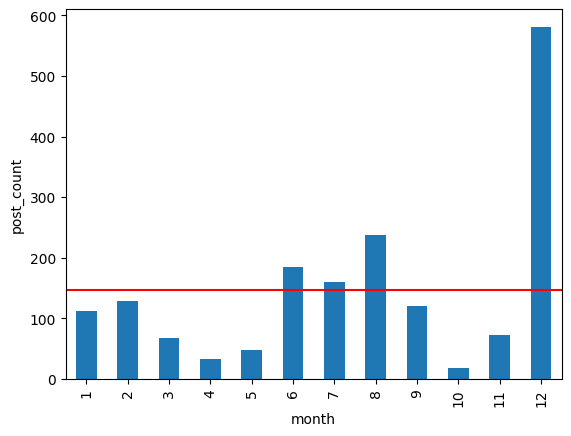

In [20]:
import matplotlib.pyplot as plt
counts_month = counts.groupby('month').sum()#月ごとに投稿数を可視化

counts_month.plot(kind='bar')
plt.axhline(counts_month.mean(), color='r')
plt.ylabel("post_count")

> 投稿数を月単位で示した上記のグラフより12月がほかの月に比べて、圧倒的に多いことがわかった。これは、バスケの試合が多く開催される月に投稿数が多くなるためであると考えられた。6月7月8月にはインターハイや全中がなどが開催されることで、投稿数が伸びていると考えられた。

> さらに、12月に顕著に投稿数が伸びているのはインカレやウインターカップ、3×3 U18日本選手権大会が行なわれているためであると考えた。ウインターカップはバスケの試合の中でも、かなり注目されている試合であるため投稿数が必然的に伸びているのだと考えられた。さらに、プロ試合として天皇杯や皇后杯の最終ラウンドが行われるということもあるためだと考えられた。

> 一方で投稿数があまり多くない3月、4月、5月、10月、11月にはあまり注目度の高くないプロではない社会人の選手権大会が行われているためであると考えられた。





### 投稿頻度と時間帯を示したヒートマップ

<Axes: xlabel='hour', ylabel='weekday'>

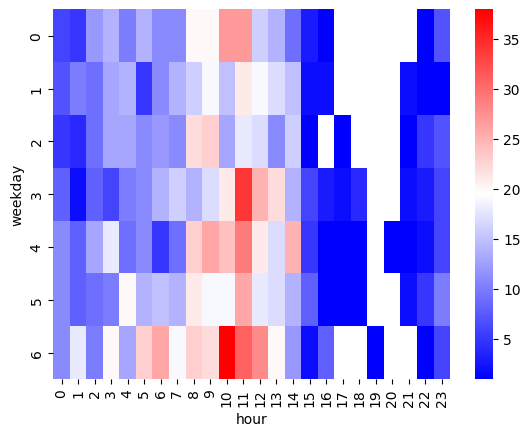

In [21]:
#ヒートマップを使って投稿数の頻度を可視化
import seaborn as sns
counts_weekday_hour = counts.groupby(['weekday', 'hour']).sum().unstack('hour')
sns.heatmap(counts_weekday_hour, cmap="bwr")#0が月曜日6が日曜日


> ０が月曜日で6が日曜日を示している。上記のヒートマップより8時から12時までの間での投稿が多いことがわかった。
また、水曜日から日曜日の間に投稿することが多いことがわかった。特に日曜日に投稿が集中するのは試合が開催されるのが日曜日に多いためであると考えられた。

> 一方で、22時から7時までの間での投稿が少ないことがわかった。これに関しては日本バスケット協会の営業時間が10から17時であることと関係していることが考えられた。また、それ以外の時間での投稿があるのは、試合結果など営業時間外の出来事を投稿するためであると考えられた。






### 投稿時間ごとのいいね数の推移

Text(0, 0.5, 'like_count')

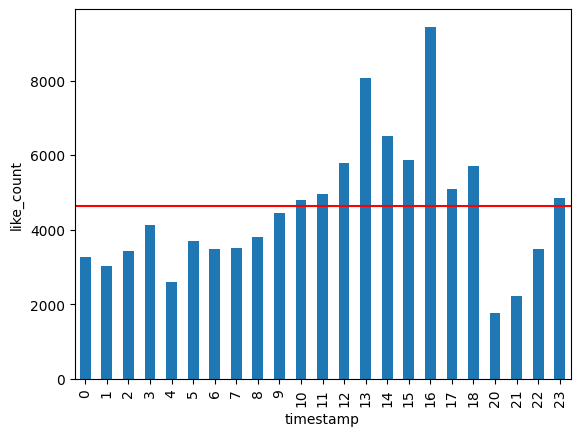

In [22]:
# 投稿時間のいいね数の分析
like_count = data['like_count'].groupby(data['timestamp'].dt.hour).agg(['sum', 'count'])

like_count_new = like_count.drop(19)# 19時のデータが極端なデータのため除く

total_mean = sum(like_count_new["sum"])/sum(like_count_new["count"])

(like_count_new['sum'] / like_count_new['count']).plot(kind='bar')#各時間当たりのいいね数の平均をプロット
plt.axhline(total_mean, color='r')#全体の平均のラインの出力
plt.ylabel("like_count")

> 10時から18時の間に投稿をした方がいいね数が多くもらえることが上記のグラフから考えられた。このようなグラフになっているのは、12時から13時の時間帯で公式アカウントが投稿した内容をフォロワーが確認して、いいねをしているためであると考えられた。また、16時の時間帯にいいね数が増えているのは学校終わりの学生が投稿を見ていいねをしているためであると考えられた。

Text(0, 0.5, 'post_count')

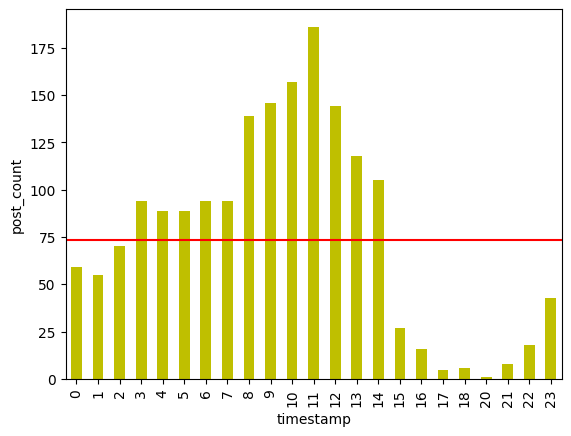

In [23]:
#投稿時間における投稿数の推移
like_count_new["count"].plot(kind = "bar",color = "y")
plt.axhline(sum(like_count_new["count"])/24,color = "r")
plt.ylabel("post_count")


> 上記のグラフからバスケ協会が営業を開始した10時から急激に投稿数が伸びていることがわかった。そして、バスケ協会が営業を終了する17に時なるにつれて投稿数が減少していることがわかった。

> 二つのグラフより、最もいいね数が伸びているのが16時であり、その時間帯に投稿があまりされていないことから、公式アカウントはフォロワーに対してより多くいいねをもらおうとして投稿をしている。というよりは業務的に情報を配信していることが考えられた。
投稿内容には宣伝の内容が含まれていることも多いので、そのような投稿は13時や16時に投稿するなどの工夫をすることが必要だと考えられた。
さらに、どちらのデータとも視覚的に時間帯によって差があることがわかる。これが正しいのかを調べるために分散分析を行った。そして、ともに有意水準５％で有意であった。そのため、時間帯によっていいね数や投稿数に明らかな違いがあることが考えられた。（分散分析の結果は付録に記載）


＊＊＊19時のデータを除外した理由となるグラフと、各時間帯における投稿数といいね数を示した表をグラフの下に示す。

<Axes: xlabel='timestamp'>

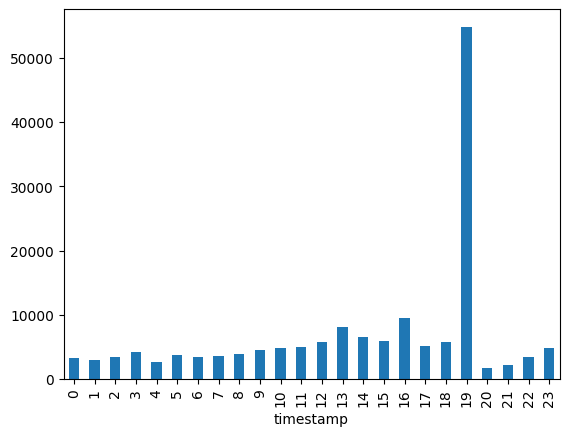

In [ ]:
(like_count['sum'] / like_count['count']).plot(kind='bar')

このグラフより明らかに19時の投稿のいいね数が多いことがわかり、その他の時間帯のいいね数の傾向が見えないことがわかる。そして、19時に投稿された件数が１つしかないため、このデータを除き全体の傾向がつかめるようにした。（投稿数が1つしかないことは下の表より確認）

In [24]:
like_count

,sum,count
timestamp,,
0,192807,59
1,166247,55
2,239888,70
3,388106,94
4,232386,89
5,329252,89
6,326505,94
7,331277,94
8,530253,139


### 取得した投稿データからワードクラウドを作成

インスタグラムの投稿データを用いて、それらを形態素解析して、それに基づいてワードクラウドを作成した。

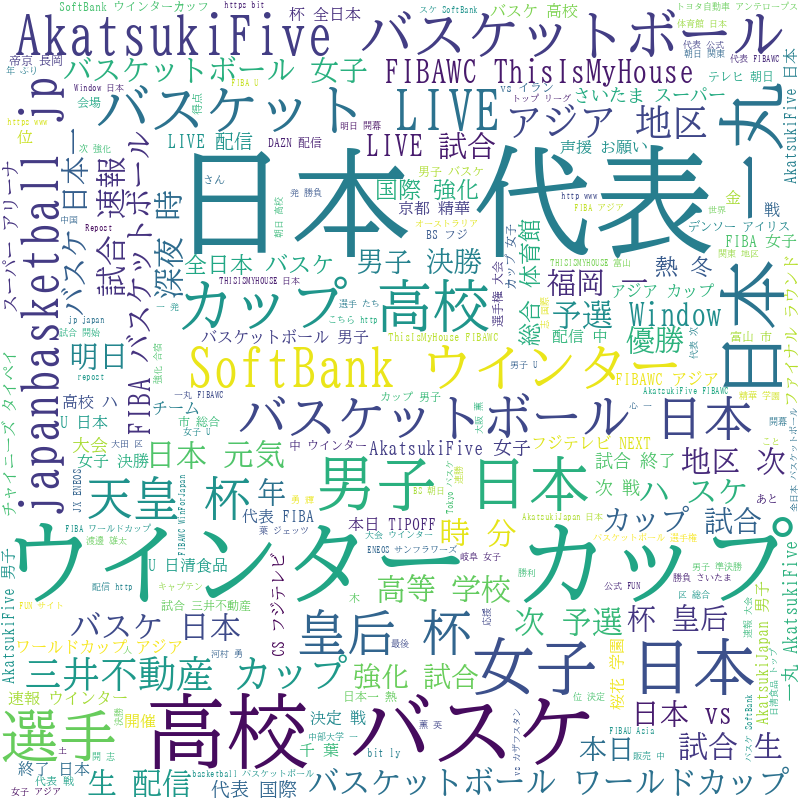

> このワードクラウドから高校バスケのウインターカップや日本代表のバスケなどの投稿が特に多いことがわかった。これは、公式アカウントが12月にバスケの主要な大会が介されることで投稿数を増やしていることとかなり関わっていることが考えられた。

### 付録

ワードクラウドを作成する際のコードや時間帯におけるいいね数や投稿数に有意差があるかの検定を行った時のコードを示す。

### janomeを使ったワードクラウドの作成

In [1]:
pip install janome #形態素解析を行うためのライブラリー

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 90.8 MB/s eta 0:00:00


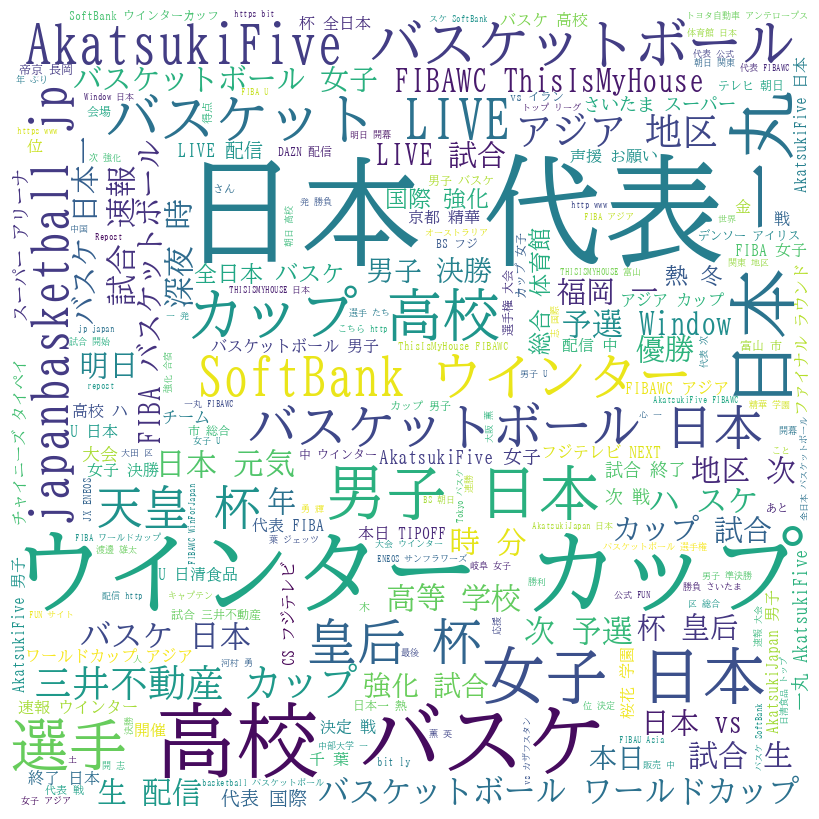

In [6]:
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager

# テキストファイルを読み込む
with open('caption_insta_all.txt', 'r', encoding='utf-8') as file:
    text = file.read()

font_path = extracted_font_path#font指定

# janomeを使ってテキストを名詞に分割する
t = Tokenizer()
nouns = []
for line in text.splitlines():
    nouns.extend([token.surface for token in t.tokenize(line) if token.part_of_speech.startswith('名詞')])



# 名詞をスペースで結合してワードクラウドを生成
wordcloud_text = ' '.join(nouns)
stop_words = [ u'月', u'日']#表示をしない文字
wordcloud = WordCloud(font_path = extracted_font_path,width=800, height=800, background_color='white',stopwords=set(stop_words)).generate(wordcloud_text)

# ワードクラウドを表示
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# ワードクラウドを保存
plt.savefig("wordcloud.png", format="png")
plt.show()


### Mecabを使った形態素解析からのワードクラウド作成

In [ ]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y#オープンソース形態素解析エンジン
!pip install mecab-python3==0.7

import MeCab # 分かち書き
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import codecs


In [ ]:

#ファイルの読み込み
with open("insta_data.txt","r",encoding = "utf-8") as file:
  text = file.read()

tagger = MeCab.Tagger("")
tagger.parse(text)
node = tagger.parseToNode(text).next
#print(node.surface)
#print(node.feature[0])

wc_text=''
while node.next:
    print(node.surface, node.feature.split(',')[0])
    if node.feature.split(',')[0]=='名詞': #名詞のみ取り出す
        wc_text += node.surface+' '
    node = node.next

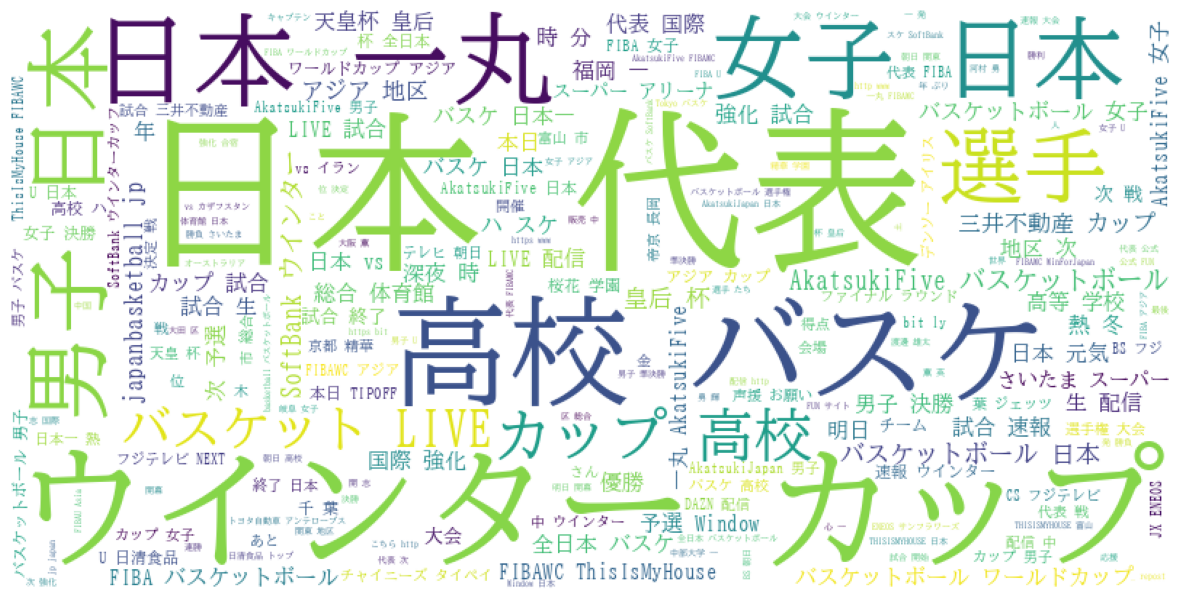

In [ ]:
stop_words = [ u'月', u'日']
wordcloud = WordCloud(font_path = extracted_font_path,background_color="white",width=800,height=400,stopwords=set(stop_words)).generate(wc_text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud.png")

### 日本語フォントが入っていない時の対応コード


In [3]:
#google colabへの日本語フォントを追加
!pip install fonttools

from fontTools.ttLib import TTFont

# .ttc ファイルのパス
ttc_file_path = '/content/BIZ-UDMinchoM.ttc'  # アップロードしたフォントのパスを指定

# 特定のフォントを抽出
font_index = 0  # 抽出したいフォントのインデックス（0から始まる整数）
output_font_path = '/content/extracted_font.ttf'
 # 抽出されたフォントを保存するパス

with TTFont(ttc_file_path, fontNumber=font_index) as font:
    font.save(output_font_path)


import matplotlib.pyplot as plt

# 抽出したフォントのパスを設定
extracted_font_path = '/content/extracted_font.ttf'  # 抽出したフォントのパスを指定

# フォントをMatplotlibに設定
plt.rcParams['font.family'] = 'DejaVu Sans'  # フォントファミリーを指定

### 分散分析（時間と投稿数の関係分析）


分散分析を行う際にはRの方が容易にできるためRを用いて行った。その時のコードを示す。この時の分析は時間を要因とした一元配置の分散分析を行った。
```
# サンプルデータ（時間と投稿数の対応関係）
time_hours <- c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
post_count <- c(59, 55, 70, 94, 89, 89, 94, 94, 139, 146, 157, 186, 144, 118, 105, 27, 16, 5, 6, 1, 1, 8, 18, 43)

# データフレームの作成
data_df <- data.frame(Time = time_hours, PostCount = post_count)

# 一元配置分散分析を実行
result_anova <- aov(PostCount ~ Time, data = data_df)

# 分散分析の結果を表示
summary(result_anova)
```

その時の結果を下記の表に示す。

```
 Df Sum Sq Mean Sq F value Pr(>F)  
Time         1  18129   18129   7.275 0.0132 *
Residuals   22  54825    2492                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
```

上記の結果より時間によって投稿数に有意な差があることがわかった。つまり、視覚的なグラフの認識と同じ分析結果であることがわかった。





### 時間と投稿数の関係分析


時間を要因としていいね数は時間によって差があるかを検証するための分散分析を行ったその時のRの実行コードと実行結果を示す。
```
# サンプルデータ（時間といいね数の対応関係）
timestamp <- c(192807, 166247, 239888, 388106, 232386, 329252, 326505, 331277, 530253, 649516, 754350, 923382, 832838, 950798, 682600, 158226, 150999, 25472, 34303, 54829, 1765, 17863, 62649, 208816)
like_count <- c(59, 55, 70, 94, 89, 89, 94, 94, 139, 146, 157, 186, 144, 118, 105, 27, 16, 5, 6, 1, 1, 8, 18, 43)

# データフレームの作成
data_df <- data.frame(Timestamp = timestamp, LikeCount = like_count)

# 一元配置分散分析を実行
result_anova <- aov(LikeCount ~ Timestamp, data = data_df)

# 分散分析の結果を表示
summary(result_anova)

```
```
  Df Sum Sq Mean Sq F value   Pr(>F)    
Timestamp    1  61288   61288   115.6 3.18e-10 ***
Residuals   22  11666     530                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

```
上記の結果より時間によっていいね数に有意な差があることがわかった。つまり、視覚的なグラフの認識と同じ分析結果であることがわかった。
